In [1]:
import numpy as np
from ax.metrics.branin import branin

from ax.plot.contour import plot_contour
from ax.plot.trace import optimization_trace_single_method
from ax.service.managed_loop import optimize
from ax.utils.measurement.synthetic_functions import hartmann6
from ax.utils.notebook.plotting import init_notebook_plotting, render

init_notebook_plotting()

[INFO 03-20 15:06:07] ax.utils.notebook.plotting: Injecting Plotly library into cell. Do not overwrite or delete cell.
[INFO 03-20 15:06:07] ax.utils.notebook.plotting: Please see
    (https://ax.dev/tutorials/visualizations.html#Fix-for-plots-that-are-not-rendering)
    if visualizations are not rendering.


In [3]:
def hartmann_evaluation_function(parameterization):
    x = np.array([parameterization.get(f"x{i+1}") for i in range(6)])
    return {"hartmann6": (hartmann6(x), 0.0), "l2norm": (np.sqrt((x**2).sum()), 0.0)}

In [4]:
best_parameters, values, experiment, model = optimize(
    parameters = [
        {"name":"x1",
         "type":"range",
         "bounds":[0.0, 1.0],
         "value_type":"float",
         "log_scale":False
        },
        {
            "name": "x2",
            "type": "range",
            "bounds": [0.0, 1.0],
        },
        {
            "name": "x3",
            "type": "range",
            "bounds": [0.0, 1.0],
        },
        {
            "name": "x4",
            "type": "range",
            "bounds": [0.0, 1.0],
        },
        {
            "name": "x5",
            "type": "range",
            "bounds": [0.0, 1.0],
        },
        {
            "name": "x6",
            "type": "range",
            "bounds": [0.0, 1.0],
        },
    ],
    experiment_name = 'test',
    objective_name = 'hartmann6',
    evaluation_function = hartmann_evaluation_function,
    minimize = True,
    parameter_constraints= ["x1 + x2 <= 20"],
    outcome_constraints = ["l2norm <= 1.25"],
    total_trials=30,
)

            

[INFO 03-20 15:12:27] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter x2. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 03-20 15:12:27] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter x3. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 03-20 15:12:27] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter x4. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 03-20 15:12:27] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter x5. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 03

In [5]:
best_parameters

{'x1': 0.4065410063749842,
 'x2': 0.8735652033986387,
 'x3': 0.4832939069224581,
 'x4': 0.5717745419515999,
 'x5': 0.08420214470609803,
 'x6': 0.04422650748070425}

In [6]:
values

({'hartmann6': -3.1763523863983516, 'l2norm': 1.2239139878645},
 {'hartmann6': {'hartmann6': 1.5323780722782493e-06, 'l2norm': 0.0},
  'l2norm': {'hartmann6': 0.0, 'l2norm': 2.1030264107006687e-08}})

In [7]:
hartmann6.fmin

-3.32237

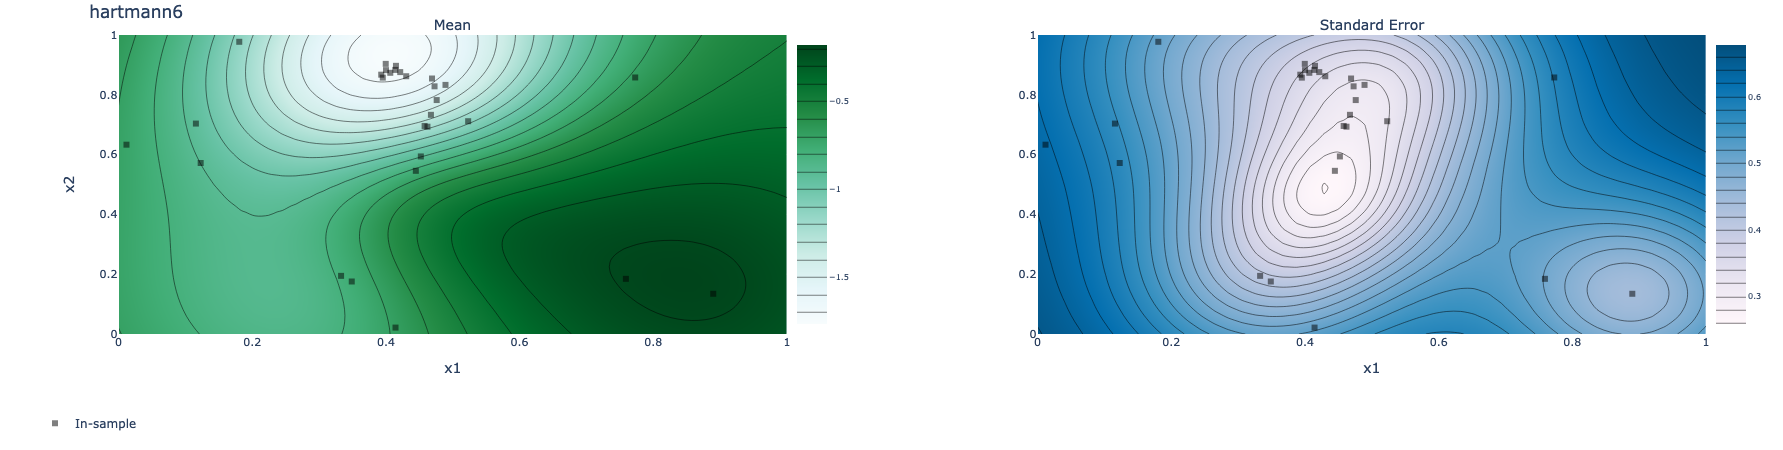

In [8]:
render(plot_contour(model = model, param_x = "x1", param_y = "x2", metric_name = "hartmann6"))

In [11]:
experiment.trials[0]

Trial(experiment_name='test', index=0, status=TrialStatus.COMPLETED, arm=Arm(name='0_0', parameters={'x1': 0.11572827398777008, 'x2': 0.703731894493103, 'x3': 0.17376366257667542, 'x4': 0.874652624130249, 'x5': 0.9941176176071167, 'x6': 0.37502321600914}))

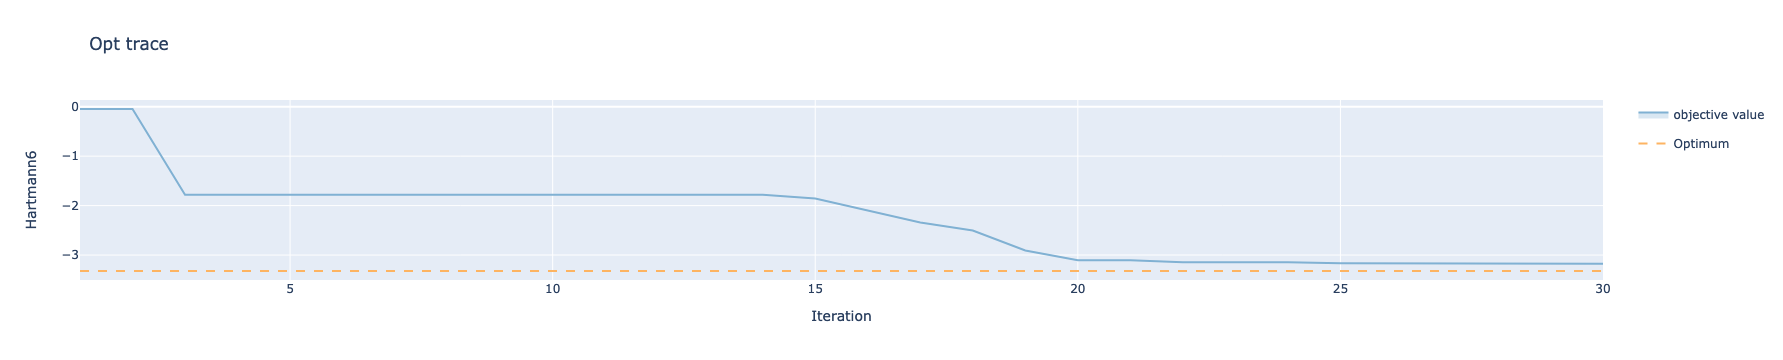

In [12]:
best_objectives = np.array(
    [[trial.objective_mean for trial in experiment.trials.values()]]
)
best_objective_plot = optimization_trace_single_method(
    y = np.minimum.accumulate(best_objectives, axis = 1),
    optimum = hartmann6.fmin,
    title = 'Opt trace',
    ylabel = "Hartmann6"
)
render(best_objective_plot)